##### Expand View


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:88% !important; }</style>"))

In [25]:
# Exploring MNIST Gans

import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST  # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist_01')

import matplotlib.pyplot as plt
# import wandb

from markipy.nn.gans.generator import get_gen_loss, Generator
from markipy.nn.gans.discriminator import get_disc_loss, Discriminator
from markipy.nn.commons import show_tensor_images, make_noise, scale_noise_by_label_number

torch.manual_seed(0)  # Set for testing purposes, please do not change!

PROJECT="MNIST"


## Hyperparameters

In [26]:
    # Mnist Playground
    device = torch.device('cuda')
    n_epochs = 100
    z_dim = 64
    display_step = 468
    log_step = 10
    batch_size = 128
    lr = 0.00001
    cur_step = 0
    mean_generator_loss = 0
    mean_discriminator_loss = 0
    test_generator = False  # Whether the generator should be tested
    gen_loss = False
    error = False

## Load Data

In [27]:
    # Load MNIST dataset as tensors
    dataloader = DataLoader(
        MNIST('.', download=True, transform=transforms.ToTensor()),
        batch_size=batch_size,
        shuffle=True)

## Core

In [28]:
    criterion = nn.BCEWithLogitsLoss()
    gen = Generator(z_dim).to(device)
    gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
    disc = Discriminator().to(device)
    disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

## View Input Data

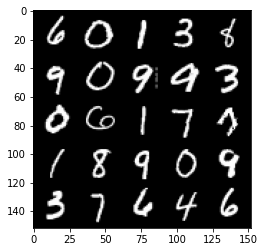

torch.Size([128, 1, 28, 28]) torch.Size([128]) tensor([6, 0, 1, 3, 8, 9, 0, 9, 9, 3, 0, 6, 1, 7, 7, 1, 8, 9, 0, 9, 3, 7, 6, 4,
        6])


In [29]:
for x,y in dataloader:
    show_tensor_images(x, num_images=25)
    print(x.shape, y.shape, y[:25])
    break
    

# Train - 1 Step

Epoch 0, step 0: Generator loss: nan, discriminator loss: 0
Epoch 0, step 10: Generator loss: 0.01632996591237875, discriminator loss: 0.014683464908192301
Epoch 0, step 20: Generator loss: 0.03167863470366877, discriminator loss: 0.02913616355667767
Epoch 0, step 30: Generator loss: 0.04743160842320858, discriminator loss: 0.043394270870420665
Epoch 0, step 40: Generator loss: 0.06356287613893166, discriminator loss: 0.057462520833708286
Epoch 0, step 50: Generator loss: 0.08012315758273132, discriminator loss: 0.0713274379571279
Epoch 0, step 60: Generator loss: 0.09709879641349499, discriminator loss: 0.08498030162265158
Epoch 0, step 70: Generator loss: 0.1145153390800851, discriminator loss: 0.09841187412922196
Epoch 0, step 80: Generator loss: 0.1324454352386996, discriminator loss: 0.11159300371112983
Epoch 0, step 90: Generator loss: 0.150861701904199, discriminator loss: 0.12452672931373628
Epoch 0, step 100: Generator loss: 0.16983238333820272, discriminator loss: 0.137180655

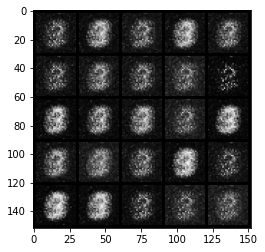

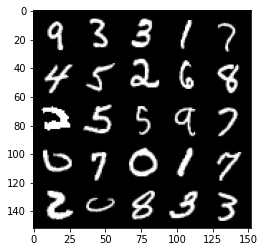

Epoch 1, step 470: Generator loss: 0.006048274345887013, discriminator loss: 0.0016076449527699724
Epoch 1, step 480: Generator loss: 0.03559868814598801, discriminator loss: 0.009674586610406892
Epoch 1, step 490: Generator loss: 0.06481287239963174, discriminator loss: 0.017877152714973844
Epoch 1, step 500: Generator loss: 0.09387043475085854, discriminator loss: 0.026160457386420328
Epoch 1, step 510: Generator loss: 0.12228661699172781, discriminator loss: 0.03452650419412515
Epoch 1, step 520: Generator loss: 0.15025917510701048, discriminator loss: 0.04286950743860669
Epoch 1, step 530: Generator loss: 0.1782976067983188, discriminator loss: 0.05135552279460125
Epoch 1, step 540: Generator loss: 0.20607958695827394, discriminator loss: 0.05986318151410828
Epoch 1, step 550: Generator loss: 0.23407040141586571, discriminator loss: 0.06831745121978285
Epoch 1, step 560: Generator loss: 0.2611437880585337, discriminator loss: 0.07681885119686775
Epoch 1, step 570: Generator loss: 0

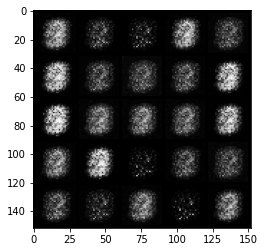

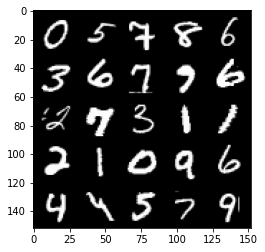

Epoch 2, step 940: Generator loss: 0.010640180009043114, discriminator loss: 0.003013476283631773
Epoch 2, step 950: Generator loss: 0.03741610457754543, discriminator loss: 0.010388113430932037
Epoch 2, step 960: Generator loss: 0.06387880215278037, discriminator loss: 0.01779645159203782
Epoch 2, step 970: Generator loss: 0.09085208024734104, discriminator loss: 0.025057898563706972
Epoch 2, step 980: Generator loss: 0.11737251587403123, discriminator loss: 0.03221132606267929
Epoch 2, step 990: Generator loss: 0.14416339203842682, discriminator loss: 0.039563811551301904
Epoch 2, step 1000: Generator loss: 0.17092715827827773, discriminator loss: 0.046668793146426864
Epoch 2, step 1010: Generator loss: 0.19855187387547937, discriminator loss: 0.05366437697512471
Epoch 2, step 1020: Generator loss: 0.2255810598532358, discriminator loss: 0.060788030998829075
Epoch 2, step 1030: Generator loss: 0.25289061691007036, discriminator loss: 0.06775261187910014
Epoch 2, step 1040: Generator 

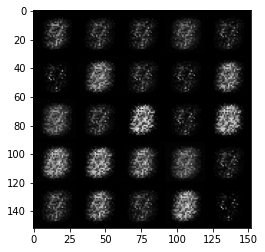

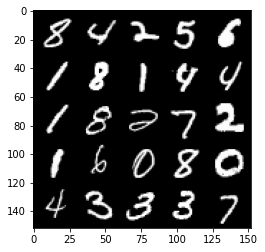

Epoch 3, step 1410: Generator loss: 0.017382804909323018, discriminator loss: 0.0035948290402053763
Epoch 3, step 1420: Generator loss: 0.04714790190386976, discriminator loss: 0.009385172054808363
Epoch 3, step 1430: Generator loss: 0.076656099058624, discriminator loss: 0.015124234951968888
Epoch 3, step 1440: Generator loss: 0.10696080658170913, discriminator loss: 0.02073223656441412
Epoch 3, step 1450: Generator loss: 0.13741343220074972, discriminator loss: 0.02628795805777241
Epoch 3, step 1460: Generator loss: 0.16792388120268148, discriminator loss: 0.03164082533146582
Epoch 3, step 1470: Generator loss: 0.19926813295763784, discriminator loss: 0.036927528233609654
Epoch 3, step 1480: Generator loss: 0.23107074850644818, discriminator loss: 0.04223072509735059
Epoch 3, step 1490: Generator loss: 0.2621644376180111, discriminator loss: 0.04743231208915384
Epoch 3, step 1500: Generator loss: 0.29458469967556805, discriminator loss: 0.05260162026836321
Epoch 3, step 1510: Generat

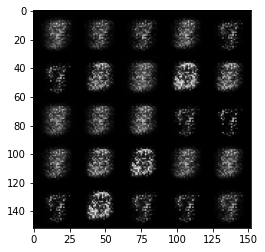

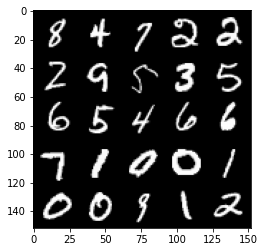

Epoch 4, step 1880: Generator loss: 0.02679021465472686, discriminator loss: 0.003870414681414254
Epoch 4, step 1890: Generator loss: 0.05932839558674739, discriminator loss: 0.00865222590091901
Epoch 4, step 1900: Generator loss: 0.09352774268541582, discriminator loss: 0.013335606258394373
Epoch 4, step 1910: Generator loss: 0.12640745543007156, discriminator loss: 0.01811787549756531
Epoch 4, step 1920: Generator loss: 0.1589758492942549, discriminator loss: 0.02299692812893125
Epoch 4, step 1930: Generator loss: 0.1927698654496772, discriminator loss: 0.027740050393801462
Epoch 4, step 1940: Generator loss: 0.2248959956515549, discriminator loss: 0.032616133140957244
Epoch 4, step 1950: Generator loss: 0.2590482983833705, discriminator loss: 0.03740913717028422
Epoch 4, step 1960: Generator loss: 0.291799327501884, discriminator loss: 0.042006829291836814
Epoch 4, step 1970: Generator loss: 0.3255266228802185, discriminator loss: 0.04683080344245982
Epoch 4, step 1980: Generator lo

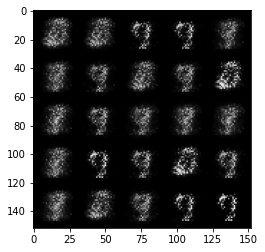

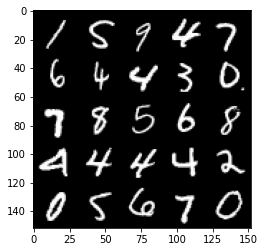

Epoch 4, step 2340: Generator loss: 0, discriminator loss: 0



Epoch 5, step 2350: Generator loss: 0.041375424617376075, discriminator loss: 0.003287649753256741
Epoch 5, step 2360: Generator loss: 0.08250897384097433, discriminator loss: 0.006597753391306626
Epoch 5, step 2370: Generator loss: 0.12478164755381072, discriminator loss: 0.009939646841878565
Epoch 5, step 2380: Generator loss: 0.1652262572549347, discriminator loss: 0.01334805232592118
Epoch 5, step 2390: Generator loss: 0.20650471988906202, discriminator loss: 0.01668908978756676
Epoch 5, step 2400: Generator loss: 0.2482750940526652, discriminator loss: 0.01991607799616634
Epoch 5, step 2410: Generator loss: 0.28993947612933624, discriminator loss: 0.023109377735955075
Epoch 5, step 2420: Generator loss: 0.33234184139814127, discriminator loss: 0.026426625748475385
Epoch 5, step 2430: Generator loss: 0.3735494300340995, discriminator loss: 0.02965610378827804
Epoch 5, step 2440: Generator loss: 0.4157532909487048, discriminator loss: 0.03295919531558314
Epoch 5, step 2450: Generato

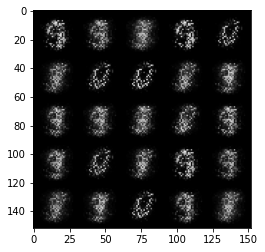

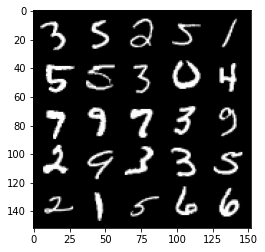

Epoch 5, step 2810: Generator loss: 0.009604547777746478, discriminator loss: 0.000538825718128783



Epoch 6, step 2820: Generator loss: 0.05868313200453408, discriminator loss: 0.003128710481473523
Epoch 6, step 2830: Generator loss: 0.10695375387485209, discriminator loss: 0.005757045876393971
Epoch 6, step 2840: Generator loss: 0.1549623659533313, discriminator loss: 0.00839398742422589
Epoch 6, step 2850: Generator loss: 0.20454407859052345, discriminator loss: 0.010839861491297046
Epoch 6, step 2860: Generator loss: 0.25426607356112224, discriminator loss: 0.01317901341005778
Epoch 6, step 2870: Generator loss: 0.30463387161238575, discriminator loss: 0.015626175169888727
Epoch 6, step 2880: Generator loss: 0.35382049409752214, discriminator loss: 0.01820578867107885
Epoch 6, step 2890: Generator loss: 0.4032247443484444, discriminator loss: 0.020793986021198786
Epoch 6, step 2900: Generator loss: 0.4537737160666376, discriminator loss: 0.023181004242764588
Epoch 6, step 2910: Generator loss: 0.5043386888300253, discriminator loss: 0.02549795556463239
Epoch 6, step 2920: Generato

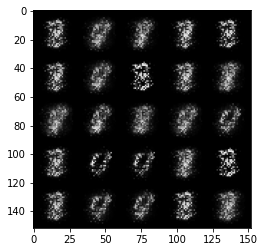

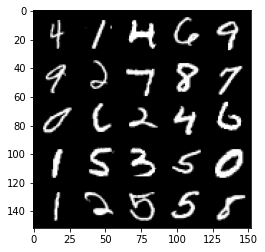

Epoch 6, step 3280: Generator loss: 0.023321649967095792, discriminator loss: 0.0008415597467086255



Epoch 7, step 3290: Generator loss: 0.08184515360074164, discriminator loss: 0.0026751302310034763
Epoch 7, step 3300: Generator loss: 0.1429402731422685, discriminator loss: 0.004493748387083029
Epoch 7, step 3310: Generator loss: 0.20076407020927492, discriminator loss: 0.006565221306732577
Epoch 7, step 3320: Generator loss: 0.2585837953111045, discriminator loss: 0.008698481859432328
Epoch 7, step 3330: Generator loss: 0.31795985780210567, discriminator loss: 0.010524073504229901
Epoch 7, step 3340: Generator loss: 0.37537968973828173, discriminator loss: 0.012695280421111321
Epoch 7, step 3350: Generator loss: 0.43488106207969857, discriminator loss: 0.014702336623882638
Epoch 7, step 3360: Generator loss: 0.4926216327227078, discriminator loss: 0.016711564018176157
Epoch 7, step 3370: Generator loss: 0.5505223371024826, discriminator loss: 0.018777081647362474
Epoch 7, step 3380: Generator loss: 0.6080790926248602, discriminator loss: 0.020737632535971138
Epoch 7, step 3390: Gene

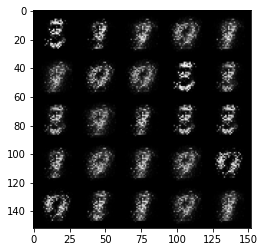

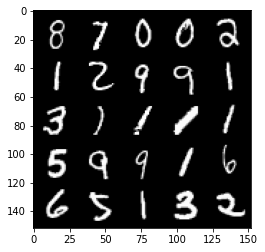

Epoch 7, step 3750: Generator loss: 0.033234445457784534, discriminator loss: 0.0012267532670854505



Epoch 8, step 3760: Generator loss: 0.0897543919392121, discriminator loss: 0.003196130180333415
Epoch 8, step 3770: Generator loss: 0.14867953153756946, discriminator loss: 0.005075627523991798
Epoch 8, step 3780: Generator loss: 0.20621329087477458, discriminator loss: 0.006986994216712112
Epoch 8, step 3790: Generator loss: 0.26395068413172007, discriminator loss: 0.008842766125742186
Epoch 8, step 3800: Generator loss: 0.3237552021303747, discriminator loss: 0.010549568276629489
Epoch 8, step 3810: Generator loss: 0.38037351003059955, discriminator loss: 0.012379712210251735
Epoch 8, step 3820: Generator loss: 0.4436891557823897, discriminator loss: 0.013907861824219043
Epoch 8, step 3830: Generator loss: 0.5022595906868957, discriminator loss: 0.015707388568000913
Epoch 8, step 3840: Generator loss: 0.5616330585928043, discriminator loss: 0.017522253303064235
Epoch 8, step 3850: Generator loss: 0.6219820492287984, discriminator loss: 0.019162467887832053
Epoch 8, step 3860: Genera

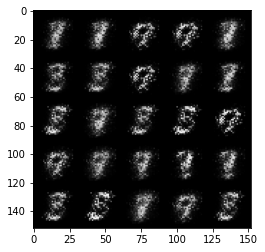

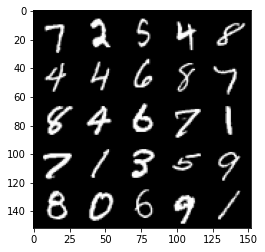

Epoch 8, step 4220: Generator loss: 0.052136574545477196, discriminator loss: 0.0012867874505682888



Epoch 9, step 4230: Generator loss: 0.11974203739410792, discriminator loss: 0.0028436229699569894
Epoch 9, step 4240: Generator loss: 0.18584905220912057, discriminator loss: 0.00445623952163081
Epoch 9, step 4250: Generator loss: 0.25104509153936666, discriminator loss: 0.005981156053260351
Epoch 9, step 4260: Generator loss: 0.31722146731156575, discriminator loss: 0.0075436251588229435
Epoch 9, step 4270: Generator loss: 0.3826900063416896, discriminator loss: 0.009076826513195649
Epoch 9, step 4280: Generator loss: 0.44858301348156393, discriminator loss: 0.010872211546087876
Epoch 9, step 4290: Generator loss: 0.5143915679719713, discriminator loss: 0.012520680856755654
Epoch 9, step 4300: Generator loss: 0.5797449895459363, discriminator loss: 0.014144771374188932
Epoch 9, step 4310: Generator loss: 0.6478555268711516, discriminator loss: 0.015605526530526126
Epoch 9, step 4320: Generator loss: 0.7162317643817673, discriminator loss: 0.017197024825419106
Epoch 9, step 4330: Gene

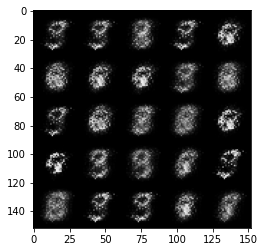

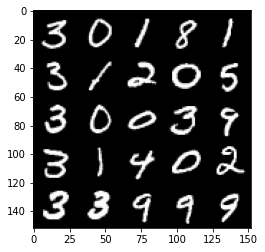

Epoch 9, step 4680: Generator loss: 0, discriminator loss: 0



Epoch 10, step 4690: Generator loss: 0.06584122751513098, discriminator loss: 0.0015504536115460927
Epoch 10, step 4700: Generator loss: 0.12902628050910103, discriminator loss: 0.0033095748537880746
Epoch 10, step 4710: Generator loss: 0.1934457136015607, discriminator loss: 0.005148932210400574
Epoch 10, step 4720: Generator loss: 0.25564226533612644, discriminator loss: 0.00684286943740315
Epoch 10, step 4730: Generator loss: 0.3197440311440037, discriminator loss: 0.008499800076342037
Epoch 10, step 4740: Generator loss: 0.3840822653892714, discriminator loss: 0.010029808164407046
Epoch 10, step 4750: Generator loss: 0.44755601373493176, discriminator loss: 0.011619413335226541
Epoch 10, step 4760: Generator loss: 0.5129845809732748, discriminator loss: 0.01307980611952197
Epoch 10, step 4770: Generator loss: 0.575938911519499, discriminator loss: 0.01463509656679936
Epoch 10, step 4780: Generator loss: 0.640657454983801, discriminator loss: 0.016170402964911398
Epoch 10, step 4790

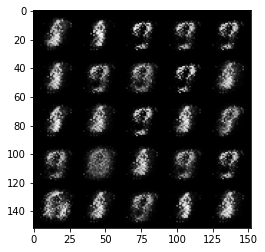

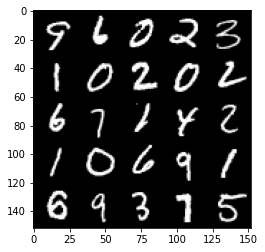

Epoch 10, step 5150: Generator loss: 0.014050207586369962, discriminator loss: 0.000251983379961079



Epoch 11, step 5160: Generator loss: 0.08358694294579008, discriminator loss: 0.001915863516111659
Epoch 11, step 5170: Generator loss: 0.1491462068680005, discriminator loss: 0.0034318552710689027
Epoch 11, step 5180: Generator loss: 0.21691233123469555, discriminator loss: 0.004942368509040937
Epoch 11, step 5190: Generator loss: 0.2853330679428883, discriminator loss: 0.006515210916280234
Epoch 11, step 5200: Generator loss: 0.35172623752528787, discriminator loss: 0.008202952579555346
Epoch 11, step 5210: Generator loss: 0.417388110079317, discriminator loss: 0.009877636885413755
Epoch 11, step 5220: Generator loss: 0.484649760600848, discriminator loss: 0.011498854232904237
Epoch 11, step 5230: Generator loss: 0.5554554533754659, discriminator loss: 0.012961090112534851
Epoch 11, step 5240: Generator loss: 0.6172578054615575, discriminator loss: 0.014682232816186216
Epoch 11, step 5250: Generator loss: 0.6887850282538649, discriminator loss: 0.016436492355588153
Epoch 11, step 526

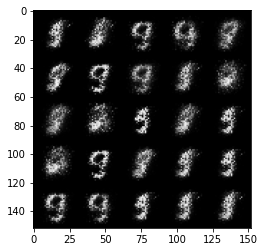

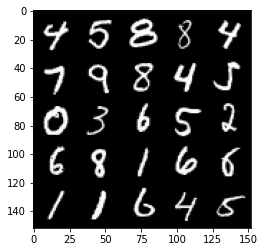

Epoch 11, step 5620: Generator loss: 0.031067383085560597, discriminator loss: 0.0005957463151241979



Epoch 12, step 5630: Generator loss: 0.10497390816354345, discriminator loss: 0.0018225006448725862
Epoch 12, step 5640: Generator loss: 0.18027917085549774, discriminator loss: 0.002919630509697729
Epoch 12, step 5650: Generator loss: 0.2555836520643316, discriminator loss: 0.00397066810590207
Epoch 12, step 5660: Generator loss: 0.333886736478561, discriminator loss: 0.004906429371868189
Epoch 12, step 5670: Generator loss: 0.41052826398458236, discriminator loss: 0.005962553032092816
Epoch 12, step 5680: Generator loss: 0.4871354429130881, discriminator loss: 0.007040287165018996
Epoch 12, step 5690: Generator loss: 0.5674727110781221, discriminator loss: 0.008003503167762972
Epoch 12, step 5700: Generator loss: 0.6444133005590521, discriminator loss: 0.008960860813211681
Epoch 12, step 5710: Generator loss: 0.7273001232717792, discriminator loss: 0.009879581821270482
Epoch 12, step 5720: Generator loss: 0.8033413387771345, discriminator loss: 0.010943973556351972
Epoch 12, step 573

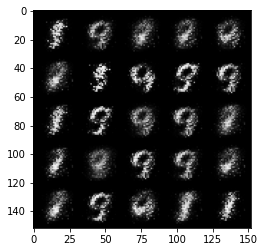

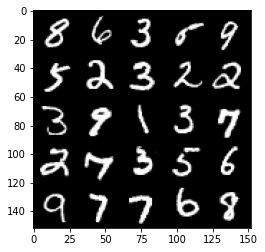

Epoch 12, step 6090: Generator loss: 0.04831186319008852, discriminator loss: 0.0004856410141811411



Epoch 13, step 6100: Generator loss: 0.12659274818550825, discriminator loss: 0.0015001828089738504
Epoch 13, step 6110: Generator loss: 0.203591138888628, discriminator loss: 0.002540482773294306
Epoch 13, step 6120: Generator loss: 0.2851872810950645, discriminator loss: 0.003446704421478969
Epoch 13, step 6130: Generator loss: 0.36252631336195856, discriminator loss: 0.004478249483956741
Epoch 13, step 6140: Generator loss: 0.4405093936838655, discriminator loss: 0.005466763041595108
Epoch 13, step 6150: Generator loss: 0.516839508826916, discriminator loss: 0.0066318511684289845
Epoch 13, step 6160: Generator loss: 0.5988792980838025, discriminator loss: 0.007616325588021268
Epoch 13, step 6170: Generator loss: 0.6765380771751078, discriminator loss: 0.008669864111699356
Epoch 13, step 6180: Generator loss: 0.7603045274049808, discriminator loss: 0.009618581857723305
Epoch 13, step 6190: Generator loss: 0.8359066477188697, discriminator loss: 0.010622196349227788
Epoch 13, step 620

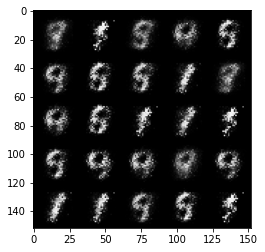

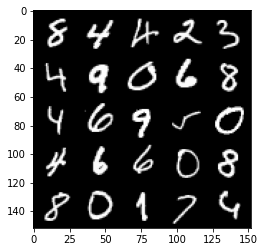

Epoch 13, step 6560: Generator loss: 0.06379060154287224, discriminator loss: 0.0006921268267254544



Epoch 14, step 6570: Generator loss: 0.14280515909194946, discriminator loss: 0.0016867924147309402
Epoch 14, step 6580: Generator loss: 0.22066859913687417, discriminator loss: 0.0028169175498505943
Epoch 14, step 6590: Generator loss: 0.2936640188225314, discriminator loss: 0.004122211653580014
Epoch 14, step 6600: Generator loss: 0.36706945478406716, discriminator loss: 0.005327086465863082
Epoch 14, step 6610: Generator loss: 0.4419393447729256, discriminator loss: 0.006516284611808439
Epoch 14, step 6620: Generator loss: 0.5167669857669078, discriminator loss: 0.007727253354258008
Epoch 14, step 6630: Generator loss: 0.5885429183642066, discriminator loss: 0.009195661920512846
Epoch 14, step 6640: Generator loss: 0.667142989289047, discriminator loss: 0.010361190574864551
Epoch 14, step 6650: Generator loss: 0.7441965901953539, discriminator loss: 0.011552514245685866
Epoch 14, step 6660: Generator loss: 0.8213348653581403, discriminator loss: 0.012665805900389831
Epoch 14, step 6

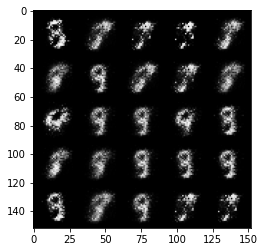

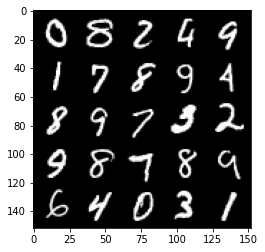

Epoch 14, step 7020: Generator loss: 0, discriminator loss: 0
Epoch 14, step 7030: Generator loss: 0.07502779644778651, discriminator loss: 0.0012050470034790854



Epoch 15, step 7040: Generator loss: 0.15305434791450825, discriminator loss: 0.0025167258408589246
Epoch 15, step 7050: Generator loss: 0.2300442778147184, discriminator loss: 0.0036748495016597285
Epoch 15, step 7060: Generator loss: 0.31013699117888754, discriminator loss: 0.004657767848390292
Epoch 15, step 7070: Generator loss: 0.38801505168279016, discriminator loss: 0.005881063667977725
Epoch 15, step 7080: Generator loss: 0.46476197191792684, discriminator loss: 0.007016869743442182
Epoch 15, step 7090: Generator loss: 0.5423939808821067, discriminator loss: 0.008133510290844066
Epoch 15, step 7100: Generator loss: 0.6202392216421598, discriminator loss: 0.00939631541299387
Epoch 15, step 7110: Generator loss: 0.6989078878337499, discriminator loss: 0.010478774806022901
Epoch 15, step 7120: Generator loss: 0.7734739082491293, discriminator loss: 0.011874412086943535
Epoch 15, step 7130: Generator loss: 0.8553022146224973, discriminator loss: 0.0130647321502304
Epoch 15, step 71

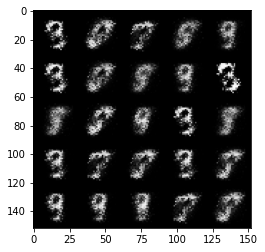

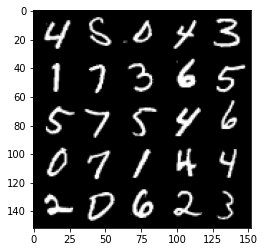

Epoch 15, step 7490: Generator loss: 0.015887989447667047, discriminator loss: 0.0002211530366514483
Epoch 15, step 7500: Generator loss: 0.0960548290839562, discriminator loss: 0.001591025167105035



Epoch 16, step 7510: Generator loss: 0.1787152269966582, discriminator loss: 0.002849640754552987
Epoch 16, step 7520: Generator loss: 0.2590339163429717, discriminator loss: 0.0039913877287608935
Epoch 16, step 7530: Generator loss: 0.3372652739541144, discriminator loss: 0.005285163211007402
Epoch 16, step 7540: Generator loss: 0.41848094544859027, discriminator loss: 0.006386838550878386
Epoch 16, step 7550: Generator loss: 0.4962063808726452, discriminator loss: 0.007746839338642919
Epoch 16, step 7560: Generator loss: 0.578094468157516, discriminator loss: 0.008939178660511972
Epoch 16, step 7570: Generator loss: 0.6532416797091821, discriminator loss: 0.010389543862806428
Epoch 16, step 7580: Generator loss: 0.7340583113523634, discriminator loss: 0.01195680065096444
Epoch 16, step 7590: Generator loss: 0.81287316685049, discriminator loss: 0.013271265790566936
Epoch 16, step 7600: Generator loss: 0.8904731839131093, discriminator loss: 0.014573580458059787
Epoch 16, step 7610: G

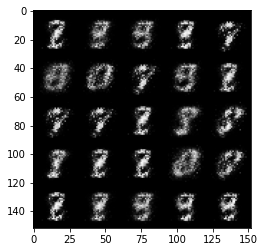

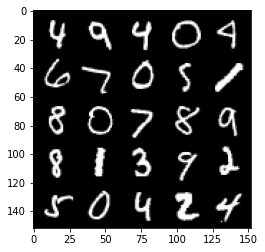

Epoch 16, step 7960: Generator loss: 0.0313291967424572, discriminator loss: 0.0004544352125535663
Epoch 16, step 7970: Generator loss: 0.11110168950170533, discriminator loss: 0.0014838354948621527



Epoch 17, step 7980: Generator loss: 0.19089193425626833, discriminator loss: 0.002692166898940873
Epoch 17, step 7990: Generator loss: 0.2718444619423303, discriminator loss: 0.0037371674074958535
Epoch 17, step 8000: Generator loss: 0.35358884701362014, discriminator loss: 0.004850076177181342
Epoch 17, step 8010: Generator loss: 0.43649355061033834, discriminator loss: 0.005916414639124503
Epoch 17, step 8020: Generator loss: 0.5156954465768274, discriminator loss: 0.007138507759087105
Epoch 17, step 8030: Generator loss: 0.5978383651146518, discriminator loss: 0.008140330887439413
Epoch 17, step 8040: Generator loss: 0.6816920546384955, discriminator loss: 0.009170809840289958
Epoch 17, step 8050: Generator loss: 0.7665177609166527, discriminator loss: 0.01010905646790679
Epoch 17, step 8060: Generator loss: 0.8464661963984497, discriminator loss: 0.011295045626500992
Epoch 17, step 8070: Generator loss: 0.9352896065793483, discriminator loss: 0.012364916662629856
Epoch 17, step 80

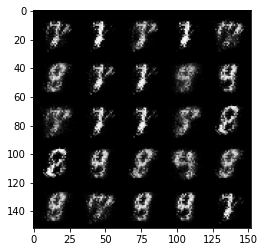

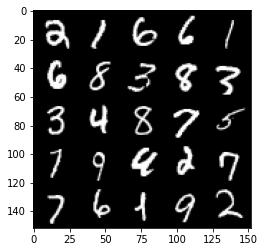

Epoch 17, step 8430: Generator loss: 0.05413369643382537, discriminator loss: 0.0006831028283788608
Epoch 17, step 8440: Generator loss: 0.1391839578620389, discriminator loss: 0.0016580926031511056



Epoch 18, step 8450: Generator loss: 0.22860375683531803, discriminator loss: 0.0027088806447055605
Epoch 18, step 8460: Generator loss: 0.3116669196348924, discriminator loss: 0.003956300787564016
Epoch 18, step 8470: Generator loss: 0.4006107485192454, discriminator loss: 0.0050116102887779205
Epoch 18, step 8480: Generator loss: 0.4872751516154688, discriminator loss: 0.005925726686787401
Epoch 18, step 8490: Generator loss: 0.574823282722734, discriminator loss: 0.006863979519241385
Epoch 18, step 8500: Generator loss: 0.6661955271011745, discriminator loss: 0.008004021309475357
Epoch 18, step 8510: Generator loss: 0.7532192871101903, discriminator loss: 0.009101549191320809
Epoch 18, step 8520: Generator loss: 0.8379860673195277, discriminator loss: 0.010055645476453585
Epoch 18, step 8530: Generator loss: 0.9232638539412086, discriminator loss: 0.011070284471075002
Epoch 18, step 8540: Generator loss: 1.0083586313785655, discriminator loss: 0.01217354266928175
Epoch 18, step 8550

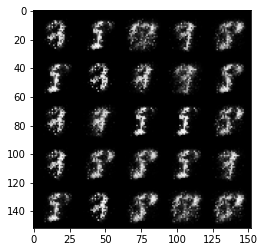

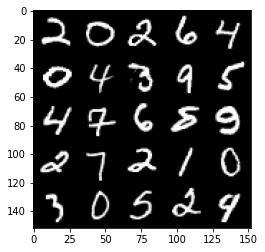

Epoch 18, step 8900: Generator loss: 0.07244928575988509, discriminator loss: 0.0006377448638280232
Epoch 18, step 8910: Generator loss: 0.1636080303762713, discriminator loss: 0.0014233884170778797



Epoch 19, step 8920: Generator loss: 0.25098114543490935, discriminator loss: 0.00235792079096676
Epoch 19, step 8930: Generator loss: 0.33672185280384154, discriminator loss: 0.0032283415118407495
Epoch 19, step 8940: Generator loss: 0.4275086369269933, discriminator loss: 0.004232620931843407
Epoch 19, step 8950: Generator loss: 0.5142513518659477, discriminator loss: 0.005264582088551461
Epoch 19, step 8960: Generator loss: 0.6039112179707258, discriminator loss: 0.006393782575574952
Epoch 19, step 8970: Generator loss: 0.6900684487106453, discriminator loss: 0.00728301762436063
Epoch 19, step 8980: Generator loss: 0.7845317064187465, discriminator loss: 0.008192526952673994
Epoch 19, step 8990: Generator loss: 0.8702093999609988, discriminator loss: 0.009167703573042765
Epoch 19, step 9000: Generator loss: 0.9633281969616556, discriminator loss: 0.010056168445919313
Epoch 19, step 9010: Generator loss: 1.0478365212424188, discriminator loss: 0.011096144421424111
Epoch 19, step 9020

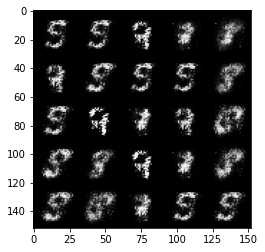

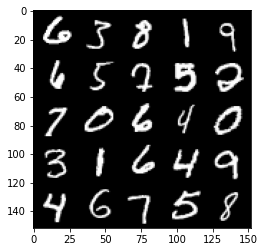

Epoch 19, step 9360: Generator loss: 0, discriminator loss: 0
Epoch 19, step 9370: Generator loss: 0.09071110914915036, discriminator loss: 0.0011888941288249106



Epoch 20, step 9380: Generator loss: 0.18205770213379818, discriminator loss: 0.0022687993895931123
Epoch 20, step 9390: Generator loss: 0.26509404997540337, discriminator loss: 0.003660419748889076
Epoch 20, step 9400: Generator loss: 0.3510991676240904, discriminator loss: 0.005020222324145658
Epoch 20, step 9410: Generator loss: 0.4341883149921384, discriminator loss: 0.006184897843238891
Epoch 20, step 9420: Generator loss: 0.5172361115105132, discriminator loss: 0.007650549607112623
Epoch 20, step 9430: Generator loss: 0.6015362882206581, discriminator loss: 0.008940160135205233
Epoch 20, step 9440: Generator loss: 0.6916577377889909, discriminator loss: 0.010089768849026704
Epoch 20, step 9450: Generator loss: 0.7841673977354651, discriminator loss: 0.01111273878675878
Epoch 20, step 9460: Generator loss: 0.8704990494964467, discriminator loss: 0.012493206988064913
Epoch 20, step 9470: Generator loss: 0.9597316093933886, discriminator loss: 0.013612829900991464
Epoch 20, step 948

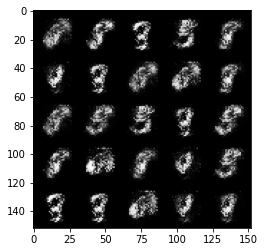

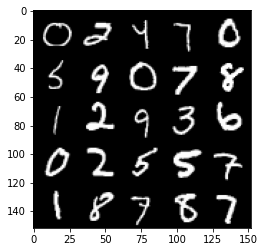

Epoch 20, step 9830: Generator loss: 0.01665464425698305, discriminator loss: 0.0002264513864985898
Epoch 20, step 9840: Generator loss: 0.10100655881767598, discriminator loss: 0.001591424855729963



Epoch 21, step 9850: Generator loss: 0.18609142405355075, discriminator loss: 0.0028354221413660254
Epoch 21, step 9860: Generator loss: 0.2680169456025474, discriminator loss: 0.004320515399305231
Epoch 21, step 9870: Generator loss: 0.3530253818911365, discriminator loss: 0.005636750489600704
Epoch 21, step 9880: Generator loss: 0.4370784076869998, discriminator loss: 0.006824707445234826
Epoch 21, step 9890: Generator loss: 0.5244608934109029, discriminator loss: 0.00803352708920327
Epoch 21, step 9900: Generator loss: 0.6110421923490672, discriminator loss: 0.009128526860099828
Epoch 21, step 9910: Generator loss: 0.6973482507925769, discriminator loss: 0.010253303911154853
Epoch 21, step 9920: Generator loss: 0.7855289216734408, discriminator loss: 0.011570222639980225
Epoch 21, step 9930: Generator loss: 0.8722715214786368, discriminator loss: 0.012857366007012434
Epoch 21, step 9940: Generator loss: 0.9567133779199716, discriminator loss: 0.014231244249380806
Epoch 21, step 9950

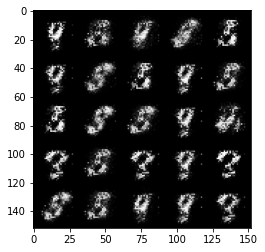

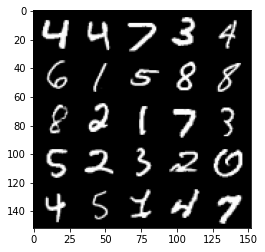

Epoch 21, step 10300: Generator loss: 0.039312158894335106, discriminator loss: 0.0003309491026796337
Epoch 21, step 10310: Generator loss: 0.13869017209762183, discriminator loss: 0.0011981621416460755



Epoch 22, step 10320: Generator loss: 0.23992840245238733, discriminator loss: 0.0021496541622994295
Epoch 22, step 10330: Generator loss: 0.33812990759173006, discriminator loss: 0.0030960726480071363
Epoch 22, step 10340: Generator loss: 0.4391366029397036, discriminator loss: 0.004026639991654799
Epoch 22, step 10350: Generator loss: 0.5450737466160048, discriminator loss: 0.004889872733057818
Epoch 22, step 10360: Generator loss: 0.6437290326142923, discriminator loss: 0.005606812775198721
Epoch 22, step 10370: Generator loss: 0.74434013142545, discriminator loss: 0.006301185319152398
Epoch 22, step 10380: Generator loss: 0.845005493897658, discriminator loss: 0.006998644437258824
Epoch 22, step 10390: Generator loss: 0.9523434791809471, discriminator loss: 0.007749561240307541
Epoch 22, step 10400: Generator loss: 1.0502593848440378, discriminator loss: 0.008649195675762037
Epoch 22, step 10410: Generator loss: 1.1551574361629968, discriminator loss: 0.009396367204877043
Epoch 22,

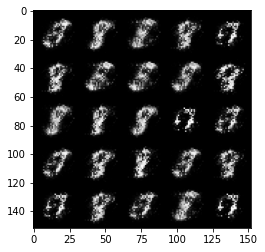

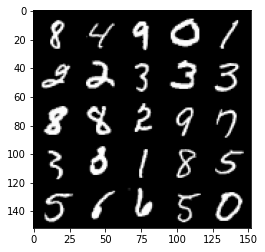

Epoch 22, step 10770: Generator loss: 0.05260315155371642, discriminator loss: 0.0005168275525554633
Epoch 22, step 10780: Generator loss: 0.1482071392556541, discriminator loss: 0.001360431647835634



Epoch 23, step 10790: Generator loss: 0.23938361854634735, discriminator loss: 0.002425899952013269
Epoch 23, step 10800: Generator loss: 0.334209255173675, discriminator loss: 0.0032188656548850056
Epoch 23, step 10810: Generator loss: 0.42789697596150594, discriminator loss: 0.004201680222828674
Epoch 23, step 10820: Generator loss: 0.5217408130311559, discriminator loss: 0.005032910762402491
Epoch 23, step 10830: Generator loss: 0.6127574510044522, discriminator loss: 0.005997214935974686
Epoch 23, step 10840: Generator loss: 0.7098462026343388, discriminator loss: 0.006964712718135523
Epoch 23, step 10850: Generator loss: 0.8017979906155513, discriminator loss: 0.007929419585240955
Epoch 23, step 10860: Generator loss: 0.8961259488366609, discriminator loss: 0.008709623498253077
Epoch 23, step 10870: Generator loss: 0.9885617336656293, discriminator loss: 0.009610046740048207
Epoch 23, step 10880: Generator loss: 1.0871318257772, discriminator loss: 0.010316587761681305
Epoch 23, s

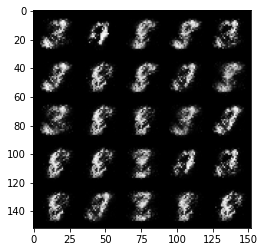

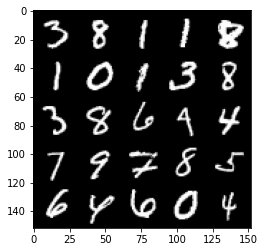

Epoch 23, step 11240: Generator loss: 0.07025679258199838, discriminator loss: 0.0009789431754213113
Epoch 23, step 11250: Generator loss: 0.15517374949577523, discriminator loss: 0.002270818648175297



Epoch 24, step 11260: Generator loss: 0.24274458131219584, discriminator loss: 0.0035039419308304795
Epoch 24, step 11270: Generator loss: 0.3270812396310333, discriminator loss: 0.0046961622662905975
Epoch 24, step 11280: Generator loss: 0.4152290102763054, discriminator loss: 0.006023432852493394
Epoch 24, step 11290: Generator loss: 0.5012924452113291, discriminator loss: 0.007396784443885853
Epoch 24, step 11300: Generator loss: 0.5984909284828056, discriminator loss: 0.008571721418386597
Epoch 24, step 11310: Generator loss: 0.6919941270453298, discriminator loss: 0.00997655869374036
Epoch 24, step 11320: Generator loss: 0.77547036175035, discriminator loss: 0.011019945236193575
Epoch 24, step 11330: Generator loss: 0.862207150357401, discriminator loss: 0.012347818738343114
Epoch 24, step 11340: Generator loss: 0.9482983141882804, discriminator loss: 0.013720026128312461
Epoch 24, step 11350: Generator loss: 1.0335652262736588, discriminator loss: 0.0150657218013309
Epoch 24, ste

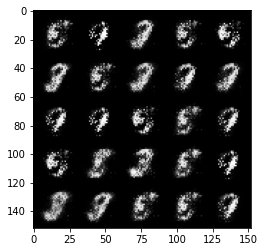

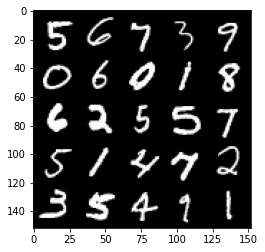

Epoch 24, step 11700: Generator loss: 0, discriminator loss: 0
Epoch 24, step 11710: Generator loss: 0.08354596347890347, discriminator loss: 0.001244338491979318
Epoch 24, step 11720: Generator loss: 0.16182201387535813, discriminator loss: 0.0023290156744993655



Epoch 25, step 11730: Generator loss: 0.25468800618098336, discriminator loss: 0.003201962002895327
Epoch 25, step 11740: Generator loss: 0.3389931341521761, discriminator loss: 0.004043935877708798
Epoch 25, step 11750: Generator loss: 0.42585790819591957, discriminator loss: 0.004905330598290659
Epoch 25, step 11760: Generator loss: 0.5153169041005975, discriminator loss: 0.005800426858039493
Epoch 25, step 11770: Generator loss: 0.6001993096791781, discriminator loss: 0.006922313497744055
Epoch 25, step 11780: Generator loss: 0.6873499414859674, discriminator loss: 0.007953163244339647
Epoch 25, step 11790: Generator loss: 0.7748589179454707, discriminator loss: 0.008999294422280328
Epoch 25, step 11800: Generator loss: 0.8630296689832312, discriminator loss: 0.009976475702550927
Epoch 25, step 11810: Generator loss: 0.9580152345518781, discriminator loss: 0.010847434811453276
Epoch 25, step 11820: Generator loss: 1.0521355607570748, discriminator loss: 0.011609604092649155
Epoch 25

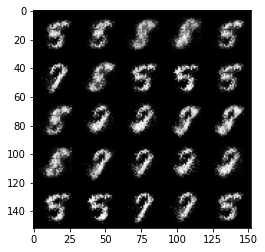

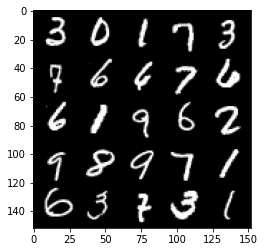

Epoch 25, step 12170: Generator loss: 0.016120853077652108, discriminator loss: 0.0001815549281035733
Epoch 25, step 12180: Generator loss: 0.10865142355617295, discriminator loss: 0.0010449763737682605
Epoch 25, step 12190: Generator loss: 0.19861456777295497, discriminator loss: 0.002017982121015716



Epoch 26, step 12200: Generator loss: 0.2874282781894391, discriminator loss: 0.0029479796942482647
Epoch 26, step 12210: Generator loss: 0.37533052405740464, discriminator loss: 0.004061645024225243
Epoch 26, step 12220: Generator loss: 0.4675963724780287, discriminator loss: 0.005246003433011282
Epoch 26, step 12230: Generator loss: 0.5611569203882135, discriminator loss: 0.006110269771331652
Epoch 26, step 12240: Generator loss: 0.6504973147669408, discriminator loss: 0.007208963302879507
Epoch 26, step 12250: Generator loss: 0.7451917467973169, discriminator loss: 0.0082097837390999
Epoch 26, step 12260: Generator loss: 0.8354240243251505, discriminator loss: 0.009233253801034555
Epoch 26, step 12270: Generator loss: 0.9339392730313486, discriminator loss: 0.010285265309911253
Epoch 26, step 12280: Generator loss: 1.0265239747161536, discriminator loss: 0.011430951098027902
Epoch 26, step 12290: Generator loss: 1.1223186279973414, discriminator loss: 0.01235482417858946
Epoch 26, s

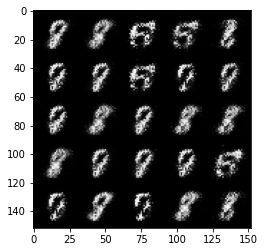

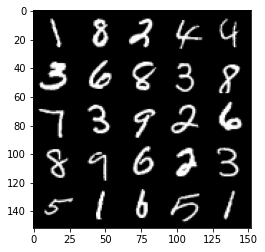

Epoch 26, step 12640: Generator loss: 0.03238775740321885, discriminator loss: 0.00031804682639164803
Epoch 26, step 12650: Generator loss: 0.13762343490225637, discriminator loss: 0.0011477098465921024
Epoch 26, step 12660: Generator loss: 0.22780396337183115, discriminator loss: 0.0018774053105750149



Epoch 27, step 12670: Generator loss: 0.32026254162829143, discriminator loss: 0.0027933143811602885
Epoch 27, step 12680: Generator loss: 0.41177138151266635, discriminator loss: 0.00358201892903218
Epoch 27, step 12690: Generator loss: 0.5023719143663716, discriminator loss: 0.004423979538468979
Epoch 27, step 12700: Generator loss: 0.5905757643218733, discriminator loss: 0.005383790677620306
Epoch 27, step 12710: Generator loss: 0.6798581791739179, discriminator loss: 0.006349533597309874
Epoch 27, step 12720: Generator loss: 0.7657140315088452, discriminator loss: 0.007474763724857418
Epoch 27, step 12730: Generator loss: 0.8550327297968743, discriminator loss: 0.008440677948200553
Epoch 27, step 12740: Generator loss: 0.9432802974668326, discriminator loss: 0.009460788144546952
Epoch 27, step 12750: Generator loss: 1.0313846677796457, discriminator loss: 0.010524809145583557
Epoch 27, step 12760: Generator loss: 1.1202829948857302, discriminator loss: 0.011628891691629195
Epoch 27

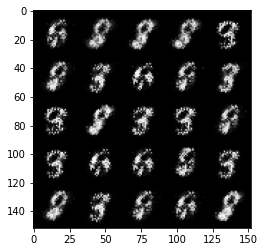

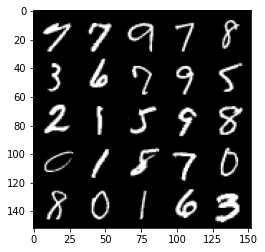

Epoch 27, step 13110: Generator loss: 0.0554867381723518, discriminator loss: 0.0006772802872026068
Epoch 27, step 13120: Generator loss: 0.14907646433919922, discriminator loss: 0.0018350155944498172
Epoch 27, step 13130: Generator loss: 0.24508318890873182, discriminator loss: 0.0029712555985738575



Epoch 28, step 13140: Generator loss: 0.3390923549986293, discriminator loss: 0.004082506001154836
Epoch 28, step 13150: Generator loss: 0.4376441571447584, discriminator loss: 0.0049523614012660115
Epoch 28, step 13160: Generator loss: 0.5304244680282397, discriminator loss: 0.005875920196278735
Epoch 28, step 13170: Generator loss: 0.6254538404635894, discriminator loss: 0.006835235843960289
Epoch 28, step 13180: Generator loss: 0.7196197463915897, discriminator loss: 0.007912303452403879
Epoch 28, step 13190: Generator loss: 0.8168312621931743, discriminator loss: 0.00911733963821306
Epoch 28, step 13200: Generator loss: 0.9137566665298916, discriminator loss: 0.009994854565518787
Epoch 28, step 13210: Generator loss: 1.0076498643964782, discriminator loss: 0.01115717194799302
Epoch 28, step 13220: Generator loss: 1.1047201365487187, discriminator loss: 0.01199764968891047
Epoch 28, step 13230: Generator loss: 1.2003866907877798, discriminator loss: 0.013120869759661263
Epoch 28, st

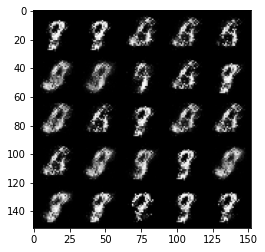

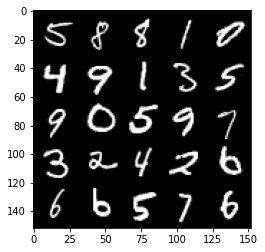

Epoch 28, step 13580: Generator loss: 0.08230149440276317, discriminator loss: 0.000670755640245401
Epoch 28, step 13590: Generator loss: 0.18417567269414917, discriminator loss: 0.0017222047457073491
Epoch 28, step 13600: Generator loss: 0.2886423432928884, discriminator loss: 0.0024896647669693348



Epoch 29, step 13610: Generator loss: 0.3877244321709005, discriminator loss: 0.0033200552257207734
Epoch 29, step 13620: Generator loss: 0.4951097190889538, discriminator loss: 0.004098342234093664
Epoch 29, step 13630: Generator loss: 0.5924312446871374, discriminator loss: 0.005128470237534016
Epoch 29, step 13640: Generator loss: 0.6863863019861725, discriminator loss: 0.0060397719717624355
Epoch 29, step 13650: Generator loss: 0.7922023707984857, discriminator loss: 0.00701828072898281
Epoch 29, step 13660: Generator loss: 0.8932927541243721, discriminator loss: 0.007856011715056932
Epoch 29, step 13670: Generator loss: 0.9900191808358212, discriminator loss: 0.008854288287444882
Epoch 29, step 13680: Generator loss: 1.0896093641590858, discriminator loss: 0.009844260909156792
Epoch 29, step 13690: Generator loss: 1.1875375122086607, discriminator loss: 0.010748841348064374
Epoch 29, step 13700: Generator loss: 1.281225270695156, discriminator loss: 0.011756143351602877
Epoch 29, 

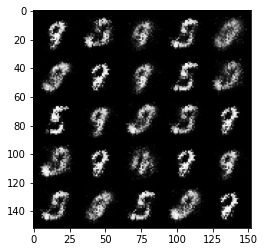

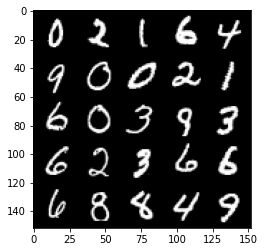

Epoch 29, step 14040: Generator loss: 0, discriminator loss: 0
Epoch 29, step 14050: Generator loss: 0.09195979028685479, discriminator loss: 0.0009380396630646836
Epoch 29, step 14060: Generator loss: 0.18718213708991677, discriminator loss: 0.0018685532845238338



Epoch 30, step 14070: Generator loss: 0.27894630900814993, discriminator loss: 0.002860863287097369
Epoch 30, step 14080: Generator loss: 0.3777974752279427, discriminator loss: 0.0035964117094906224
Epoch 30, step 14090: Generator loss: 0.47606631629487367, discriminator loss: 0.004419553712503905
Epoch 30, step 14100: Generator loss: 0.5785080398249828, discriminator loss: 0.005160515946853493
Epoch 30, step 14110: Generator loss: 0.6754621297885209, discriminator loss: 0.005900674153310366
Epoch 30, step 14120: Generator loss: 0.7756885178068765, discriminator loss: 0.006503376910765459
Epoch 30, step 14130: Generator loss: 0.8685926372169429, discriminator loss: 0.007164161716006763
Epoch 30, step 14140: Generator loss: 0.9681268859113383, discriminator loss: 0.007885292785353644
Epoch 30, step 14150: Generator loss: 1.0664407259378679, discriminator loss: 0.008628210697609646
Epoch 30, step 14160: Generator loss: 1.159383124775357, discriminator loss: 0.009368617103522662
Epoch 30

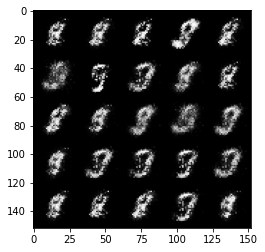

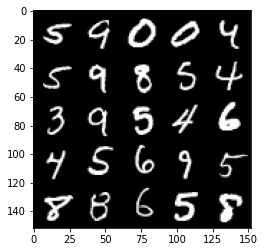

Epoch 30, step 14510: Generator loss: 0.017931859717409834, discriminator loss: 0.00020500294800497527
Epoch 30, step 14520: Generator loss: 0.10686332293045826, discriminator loss: 0.0012413575194585016
Epoch 30, step 14530: Generator loss: 0.20572141042122472, discriminator loss: 0.0020093097049010615



Epoch 31, step 14540: Generator loss: 0.2917305266755259, discriminator loss: 0.0028790189988083304
Epoch 31, step 14550: Generator loss: 0.3792720971963344, discriminator loss: 0.003801636067497678
Epoch 31, step 14560: Generator loss: 0.4776993857489691, discriminator loss: 0.004421490192827249
Epoch 31, step 14570: Generator loss: 0.5730974276860555, discriminator loss: 0.005188016871659035
Epoch 31, step 14580: Generator loss: 0.6775696644416225, discriminator loss: 0.005638990531333236
Epoch 31, step 14590: Generator loss: 0.7679928113252692, discriminator loss: 0.006206524924526357
Epoch 31, step 14600: Generator loss: 0.8626828448385258, discriminator loss: 0.00707152247444814
Epoch 31, step 14610: Generator loss: 0.9624389420207753, discriminator loss: 0.007830009282303926
Epoch 31, step 14620: Generator loss: 1.052967594220088, discriminator loss: 0.008571360224428086
Epoch 31, step 14630: Generator loss: 1.156602516643002, discriminator loss: 0.009410503788047241
Epoch 31, st

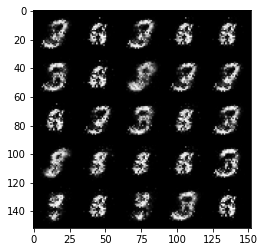

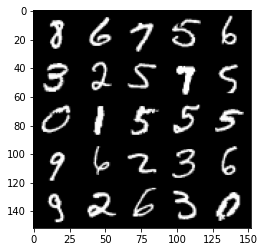

Epoch 31, step 14980: Generator loss: 0.03736911472092327, discriminator loss: 0.0004401101420323054
Epoch 31, step 14990: Generator loss: 0.13620333182506073, discriminator loss: 0.001338094536565308
Epoch 31, step 15000: Generator loss: 0.23386188246246076, discriminator loss: 0.0020953323333882373



Epoch 32, step 15010: Generator loss: 0.33711201411027175, discriminator loss: 0.002826533073352443
Epoch 32, step 15020: Generator loss: 0.4356972896135771, discriminator loss: 0.00374939954545126
Epoch 32, step 15030: Generator loss: 0.5338621302547618, discriminator loss: 0.004797641912268267
Epoch 32, step 15040: Generator loss: 0.6301615421588606, discriminator loss: 0.005740419746591494
Epoch 32, step 15050: Generator loss: 0.7362643205202545, discriminator loss: 0.006508100943034912
Epoch 32, step 15060: Generator loss: 0.8268881761110748, discriminator loss: 0.007631644202619152
Epoch 32, step 15070: Generator loss: 0.9242518467780872, discriminator loss: 0.008326281835205658
Epoch 32, step 15080: Generator loss: 1.028140215792208, discriminator loss: 0.009135834715512188
Epoch 32, step 15090: Generator loss: 1.1291797191668784, discriminator loss: 0.009747301695995731
Epoch 32, step 15100: Generator loss: 1.233092285629012, discriminator loss: 0.010477547710920625
Epoch 32, st

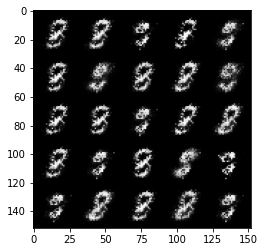

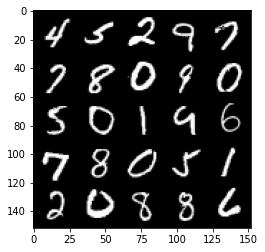

Epoch 32, step 15450: Generator loss: 0.06141169865926106, discriminator loss: 0.00038068171622406726
Epoch 32, step 15460: Generator loss: 0.1638716163798275, discriminator loss: 0.0012704350102024202
Epoch 32, step 15470: Generator loss: 0.25509809530698335, discriminator loss: 0.0022314156596668256



Epoch 33, step 15480: Generator loss: 0.35842297729263956, discriminator loss: 0.003132425638663972
Epoch 33, step 15490: Generator loss: 0.4540155672619485, discriminator loss: 0.004078924074832699
Epoch 33, step 15500: Generator loss: 0.554816348430438, discriminator loss: 0.0047603155343005285
Epoch 33, step 15510: Generator loss: 0.6504096164662615, discriminator loss: 0.005732789472477812
Epoch 33, step 15520: Generator loss: 0.7533209349355127, discriminator loss: 0.006513757862023308
Epoch 33, step 15530: Generator loss: 0.853658117290236, discriminator loss: 0.007227433308099324
Epoch 33, step 15540: Generator loss: 0.9587712822816312, discriminator loss: 0.008037813843633885
Epoch 33, step 15550: Generator loss: 1.054770834935017, discriminator loss: 0.008977954176405812
Epoch 33, step 15560: Generator loss: 1.1561388668850952, discriminator loss: 0.009875580147067962
Epoch 33, step 15570: Generator loss: 1.2541897312188754, discriminator loss: 0.010786490725815044
Epoch 33, s

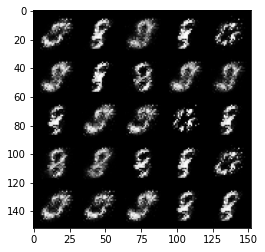

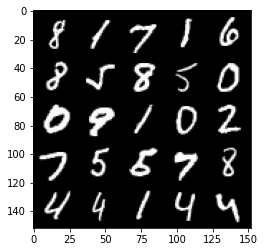

Epoch 33, step 15920: Generator loss: 0.08998472975869465, discriminator loss: 0.0007491293442873364
Epoch 33, step 15930: Generator loss: 0.20340760141356382, discriminator loss: 0.0014462071534596449
Epoch 33, step 15940: Generator loss: 0.31142598339635086, discriminator loss: 0.002238785664941001



Epoch 34, step 15950: Generator loss: 0.4202562315851196, discriminator loss: 0.0029958644842044413
Epoch 34, step 15960: Generator loss: 0.5221245309226535, discriminator loss: 0.003687980162919077
Epoch 34, step 15970: Generator loss: 0.6281883146008876, discriminator loss: 0.004502011232205435
Epoch 34, step 15980: Generator loss: 0.7346588199974129, discriminator loss: 0.005095471781240694
Epoch 34, step 15990: Generator loss: 0.8334563379613766, discriminator loss: 0.005904947489133881
Epoch 34, step 16000: Generator loss: 0.939464188029624, discriminator loss: 0.006625375981068504
Epoch 34, step 16010: Generator loss: 1.0350369184445116, discriminator loss: 0.007500866591198063
Epoch 34, step 16020: Generator loss: 1.1268997559180631, discriminator loss: 0.00848164459547171
Epoch 34, step 16030: Generator loss: 1.230783731509478, discriminator loss: 0.009070804858038947
Epoch 34, step 16040: Generator loss: 1.327141623721164, discriminator loss: 0.009876474779911144
Epoch 34, ste

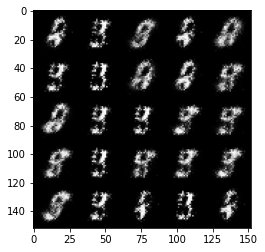

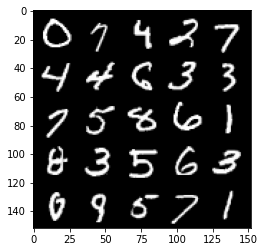

Epoch 34, step 16380: Generator loss: 0, discriminator loss: 0
Epoch 34, step 16390: Generator loss: 0.08589925266738631, discriminator loss: 0.0010098069150032652
Epoch 34, step 16400: Generator loss: 0.183820975641919, discriminator loss: 0.0019705302846164275
Epoch 34, step 16410: Generator loss: 0.2783338773963798, discriminator loss: 0.003129007163433693



Epoch 35, step 16420: Generator loss: 0.3695875462303814, discriminator loss: 0.00405485756122149
Epoch 35, step 16430: Generator loss: 0.4562538902983707, discriminator loss: 0.005390415023853127
Epoch 35, step 16440: Generator loss: 0.550817508982797, discriminator loss: 0.006148103732042589
Epoch 35, step 16450: Generator loss: 0.6423795854943432, discriminator loss: 0.007133779796556787
Epoch 35, step 16460: Generator loss: 0.7347256576913035, discriminator loss: 0.008107283841181773
Epoch 35, step 16470: Generator loss: 0.8240141313300173, discriminator loss: 0.008986308677201602
Epoch 35, step 16480: Generator loss: 0.916809996478578, discriminator loss: 0.009992206580618515
Epoch 35, step 16490: Generator loss: 1.0104096297524934, discriminator loss: 0.011079282185428935
Epoch 35, step 16500: Generator loss: 1.0993789959157634, discriminator loss: 0.011972179202538022
Epoch 35, step 16510: Generator loss: 1.1869348445509231, discriminator loss: 0.013188510054610997
Epoch 35, ste

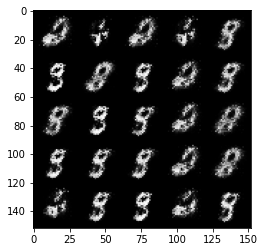

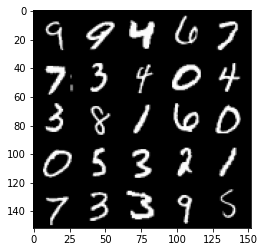

Epoch 35, step 16850: Generator loss: 0.01884025793809157, discriminator loss: 0.00014573878521083767
Epoch 35, step 16860: Generator loss: 0.11471615948228754, discriminator loss: 0.0013033757424061624
Epoch 35, step 16870: Generator loss: 0.20837433470620054, discriminator loss: 0.0022239583050911753
Epoch 35, step 16880: Generator loss: 0.3108775488331787, discriminator loss: 0.003082273032468481



Epoch 36, step 16890: Generator loss: 0.4137111082036271, discriminator loss: 0.003782740274730783
Epoch 36, step 16900: Generator loss: 0.5053037048405052, discriminator loss: 0.0051618319335115
Epoch 36, step 16910: Generator loss: 0.6105980261778219, discriminator loss: 0.006250587461166019
Epoch 36, step 16920: Generator loss: 0.7048129913134452, discriminator loss: 0.007194439564139032
Epoch 36, step 16930: Generator loss: 0.7988754225592327, discriminator loss: 0.008217214027610727
Epoch 36, step 16940: Generator loss: 0.8950406720495631, discriminator loss: 0.00919130556165981
Epoch 36, step 16950: Generator loss: 0.9862605287478519, discriminator loss: 0.010191452110377256
Epoch 36, step 16960: Generator loss: 1.0821130097421823, discriminator loss: 0.01103161484934389
Epoch 36, step 16970: Generator loss: 1.1708975001278086, discriminator loss: 0.01199708186671074
Epoch 36, step 16980: Generator loss: 1.2657261516293907, discriminator loss: 0.013008017520794373
Epoch 36, step 

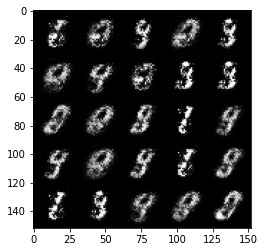

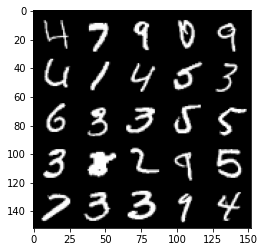

Epoch 36, step 17320: Generator loss: 0.04000358092479217, discriminator loss: 0.0003475798612349054
Epoch 36, step 17330: Generator loss: 0.144355747434828, discriminator loss: 0.0012055615711415934
Epoch 36, step 17340: Generator loss: 0.2464611652569893, discriminator loss: 0.002218737939579619
Epoch 36, step 17350: Generator loss: 0.34275289478465026, discriminator loss: 0.003241982299070328



Epoch 37, step 17360: Generator loss: 0.4406188267927904, discriminator loss: 0.004356395767635516
Epoch 37, step 17370: Generator loss: 0.5364267632492588, discriminator loss: 0.0055318940510479826
Epoch 37, step 17380: Generator loss: 0.6320782023617347, discriminator loss: 0.006777556987208691
Epoch 37, step 17390: Generator loss: 0.7288839450249308, discriminator loss: 0.008030251162047064
Epoch 37, step 17400: Generator loss: 0.8277537191016043, discriminator loss: 0.0091390507375328
Epoch 37, step 17410: Generator loss: 0.9308032882519259, discriminator loss: 0.010317335864449417
Epoch 37, step 17420: Generator loss: 1.020195982904516, discriminator loss: 0.011855288977838229
Epoch 37, step 17430: Generator loss: 1.1087921414619841, discriminator loss: 0.013164847782757295
Epoch 37, step 17440: Generator loss: 1.208377567621378, discriminator loss: 0.014146029825807895
Epoch 37, step 17450: Generator loss: 1.300726702580085, discriminator loss: 0.015112726356133694
Epoch 37, step

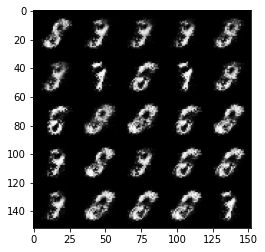

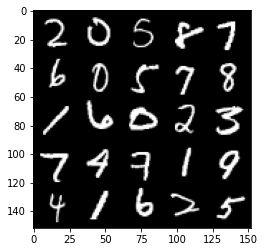

Epoch 37, step 17790: Generator loss: 0.05417596784412351, discriminator loss: 0.0006872218651458239
Epoch 37, step 17800: Generator loss: 0.1375618816440941, discriminator loss: 0.0023523529744746852
Epoch 37, step 17810: Generator loss: 0.21838445897795195, discriminator loss: 0.0038535199048491137
Epoch 37, step 17820: Generator loss: 0.3020455047615572, discriminator loss: 0.005387900994183164



Epoch 38, step 17830: Generator loss: 0.3870719314640404, discriminator loss: 0.006679859553646841
Epoch 38, step 17840: Generator loss: 0.47192935709260464, discriminator loss: 0.007924338404694179
Epoch 38, step 17850: Generator loss: 0.5577909029447115, discriminator loss: 0.009469406607632458
Epoch 38, step 17860: Generator loss: 0.643971484950465, discriminator loss: 0.01137529639129201
Epoch 38, step 17870: Generator loss: 0.7316903074582416, discriminator loss: 0.012692772747518928
Epoch 38, step 17880: Generator loss: 0.8212155098589055, discriminator loss: 0.014068195277936443
Epoch 38, step 17890: Generator loss: 0.9174222166721635, discriminator loss: 0.015401334911744061
Epoch 38, step 17900: Generator loss: 1.0113738128262704, discriminator loss: 0.01667918599584801
Epoch 38, step 17910: Generator loss: 1.0984108015003364, discriminator loss: 0.018594597613550402
Epoch 38, step 17920: Generator loss: 1.1962515436685999, discriminator loss: 0.020040720386796784
Epoch 38, st

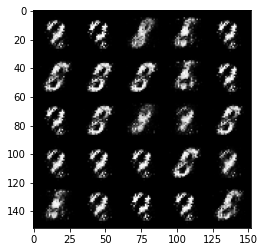

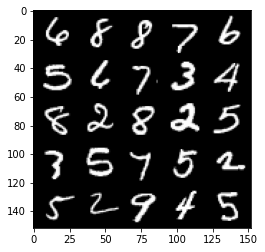

Epoch 38, step 18260: Generator loss: 0.07233880574886616, discriminator loss: 0.0010531566018222743
Epoch 38, step 18270: Generator loss: 0.17058881174804816, discriminator loss: 0.0021772271213241112
Epoch 38, step 18280: Generator loss: 0.2732257654524257, discriminator loss: 0.0030064927374259527
Epoch 38, step 18290: Generator loss: 0.37206290776912987, discriminator loss: 0.0039086244467040916



Epoch 39, step 18300: Generator loss: 0.4724009612686615, discriminator loss: 0.004838366439550095
Epoch 39, step 18310: Generator loss: 0.5762346712951987, discriminator loss: 0.0057350704008633764
Epoch 39, step 18320: Generator loss: 0.6775285866525439, discriminator loss: 0.0069150981158973305
Epoch 39, step 18330: Generator loss: 0.7835606545464605, discriminator loss: 0.007903089460272053
Epoch 39, step 18340: Generator loss: 0.8872030591353393, discriminator loss: 0.008906597454642125
Epoch 39, step 18350: Generator loss: 0.995731194304605, discriminator loss: 0.009935294652087052
Epoch 39, step 18360: Generator loss: 1.110012481864701, discriminator loss: 0.01101117617347174
Epoch 39, step 18370: Generator loss: 1.2066191613164725, discriminator loss: 0.012520125084039239
Epoch 39, step 18380: Generator loss: 1.318186359018343, discriminator loss: 0.013830477503152232
Epoch 39, step 18390: Generator loss: 1.4265190327269408, discriminator loss: 0.015021862625343425
Epoch 39, st

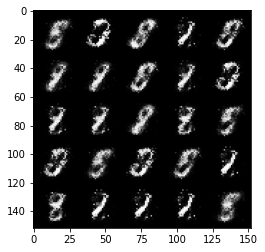

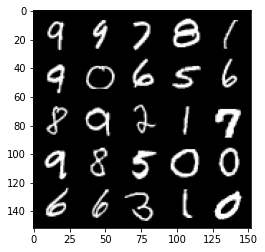

Epoch 39, step 18720: Generator loss: 0, discriminator loss: 0
Epoch 39, step 18730: Generator loss: 0.10048903155530621, discriminator loss: 0.0006455121398704429
Epoch 39, step 18740: Generator loss: 0.19866157800723347, discriminator loss: 0.001464847369820007
Epoch 39, step 18750: Generator loss: 0.29958322924426484, discriminator loss: 0.002436676665615195



Epoch 40, step 18760: Generator loss: 0.3923652936250736, discriminator loss: 0.003252760019615038
Epoch 40, step 18770: Generator loss: 0.49059040729816145, discriminator loss: 0.00413175307524701
Epoch 40, step 18780: Generator loss: 0.5827002841183263, discriminator loss: 0.005202813322743416
Epoch 40, step 18790: Generator loss: 0.6746661683433076, discriminator loss: 0.0058383148891899056
Epoch 40, step 18800: Generator loss: 0.7738668113692194, discriminator loss: 0.006685155855778318
Epoch 40, step 18810: Generator loss: 0.8661584823559492, discriminator loss: 0.007593437362637403
Epoch 40, step 18820: Generator loss: 0.9588420248439168, discriminator loss: 0.008631639077097308
Epoch 40, step 18830: Generator loss: 1.055913447314857, discriminator loss: 0.009453119413576955
Epoch 40, step 18840: Generator loss: 1.1562570527068565, discriminator loss: 0.01022302423818753
Epoch 40, step 18850: Generator loss: 1.2504645840734492, discriminator loss: 0.011203211107346997
Epoch 40, s

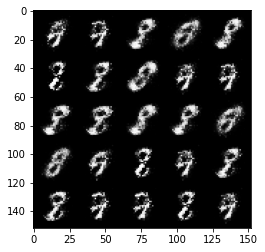

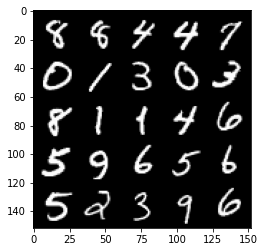

Epoch 40, step 19190: Generator loss: 0.020664871248424563, discriminator loss: 0.0002966030604309506
Epoch 40, step 19200: Generator loss: 0.12534267576331767, discriminator loss: 0.0016185242889655961
Epoch 40, step 19210: Generator loss: 0.2382652596530751, discriminator loss: 0.0030175205757921072
Epoch 40, step 19220: Generator loss: 0.3416523485102205, discriminator loss: 0.004189494356481185



Epoch 41, step 19230: Generator loss: 0.4552673295012906, discriminator loss: 0.004953630252653717
Epoch 41, step 19240: Generator loss: 0.5603253311581082, discriminator loss: 0.005867005421374089
Epoch 41, step 19250: Generator loss: 0.6650622033665324, discriminator loss: 0.0070149927503532815
Epoch 41, step 19260: Generator loss: 0.7732270833773494, discriminator loss: 0.008225853240483591
Epoch 41, step 19270: Generator loss: 0.8843332182647838, discriminator loss: 0.00921231492732962
Epoch 41, step 19280: Generator loss: 0.987031003348848, discriminator loss: 0.01051162435219456
Epoch 41, step 19290: Generator loss: 1.1006458141864877, discriminator loss: 0.011521113992660731
Epoch 41, step 19300: Generator loss: 1.2144559499544976, discriminator loss: 0.012918208522769889
Epoch 41, step 19310: Generator loss: 1.3210472235312825, discriminator loss: 0.013856318854909934
Epoch 41, step 19320: Generator loss: 1.4289039271509543, discriminator loss: 0.014996084480140455
Epoch 41, st

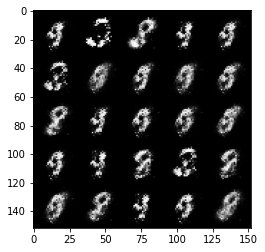

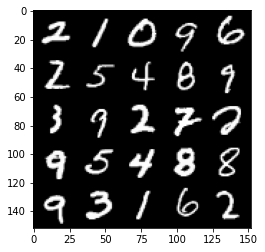

Epoch 41, step 19660: Generator loss: 0.03451545727558625, discriminator loss: 0.0005835265430629763
Epoch 41, step 19670: Generator loss: 0.13090964565929186, discriminator loss: 0.0015466843262060077
Epoch 41, step 19680: Generator loss: 0.2234078080226214, discriminator loss: 0.0028389032500294544
Epoch 41, step 19690: Generator loss: 0.3234688629451981, discriminator loss: 0.003629508746676465



Epoch 42, step 19700: Generator loss: 0.4121934511722664, discriminator loss: 0.0046126293734862255
Epoch 42, step 19710: Generator loss: 0.5067519153285233, discriminator loss: 0.0057058386687730625
Epoch 42, step 19720: Generator loss: 0.6024151225375316, discriminator loss: 0.006529705013888767
Epoch 42, step 19730: Generator loss: 0.6920559467413488, discriminator loss: 0.007791791584852157
Epoch 42, step 19740: Generator loss: 0.785176487050505, discriminator loss: 0.008977172510204915
Epoch 42, step 19750: Generator loss: 0.8732664870400716, discriminator loss: 0.010132661196761403
Epoch 42, step 19760: Generator loss: 0.9588610713298505, discriminator loss: 0.011248152356785838
Epoch 42, step 19770: Generator loss: 1.0524599353472393, discriminator loss: 0.012508071254556755
Epoch 42, step 19780: Generator loss: 1.1375584352729669, discriminator loss: 0.014022917570307466
Epoch 42, step 19790: Generator loss: 1.2355950403417277, discriminator loss: 0.01534770775793327
Epoch 42, 

In [ ]:
disc_init = False
for epoch in range(n_epochs):
    
    # Dataloader returns the batches
    for real, label in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        if cur_step % 28: 
            ### Update discriminator ###
            # Zero out the gradients before backpropagation
            disc_opt.zero_grad()

            # Calculate discriminator loss
            disc_loss = get_disc_loss(gen, disc, criterion, real, label, cur_batch_size, z_dim, device)

            # Update gradients
            disc_loss.backward(retain_graph=True)

            # Update optimizer
            disc_opt.step()
            
            disc_init = True

        # For testing purposes, to keep track of the generator weights
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        # Update gradients
        gen_opt.zero_grad()

        # Update optimizer
        gen_loss = get_gen_loss(gen, disc, criterion, label, cur_batch_size, z_dim, device)

        # Update gradients
        gen_loss.backward(retain_graph=True)

        # Update optimizer
        gen_opt.step()

        # For testing purposes, to check that your code changes the generator weights
        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
                
            except:
                error = True
                
                # wandb.log({"no_training": 1, "epoch": epoch, "loss": loss})
                print("Runtime tests have failed")

        if disc_init:
            # Keep track of the average discriminator loss
            mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:


            noise = make_noise(cur_batch_size, z_dim, device=device)
            fake = gen(noise)
            
            show_tensor_images(fake)
            show_tensor_images(real)
            
            mean_generator_loss = 0
            mean_discriminator_loss = 0
            

        
        if cur_step % log_step == 0 and log_step > 0:
            # wandb.log({ "Epoch" : epoch, "step": cur_step , "Generator_Loss" : mean_generator_loss, "Discriminator_Loss": mean_discriminator_loss })
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss if disc_init else 'nan'}, discriminator loss: {mean_discriminator_loss}")
            # Tensorboard
            writer.add_scalar('mean_generator loss', mean_generator_loss, cur_step)
            writer.add_scalar('mean_discriminator_loss loss', mean_discriminator_loss, cur_step)
        
        # Increase step
        cur_step += 1
    
        
        
# Shift + o  : To show scroll the ouput 

In [99]:
labe

tensor([3, 2, 1, 9, 1, 9, 1, 0, 9, 2, 2, 7, 6, 1, 9, 7, 7, 7, 2, 2, 6, 9, 7, 4,
        9, 9, 0, 4, 3, 4, 2, 2, 0, 9, 0, 0, 6, 6, 7, 9, 7, 7, 6, 4, 2, 6, 5, 9,
        1, 1, 0, 4, 4, 4, 7, 3, 0, 4, 5, 4, 5, 3, 3, 1, 6, 1, 2, 7, 3, 8, 2, 0,
        3, 6, 4, 7, 7, 7, 9, 0, 4, 7, 5, 2, 7, 3, 2, 7, 1, 2, 5, 1, 4, 2, 2, 7])

In [140]:

noise.shape,label.shape


(torch.Size([96, 64]), torch.Size([96]))

In [126]:
label = label.view(1,96)
label.shape

torch.Size([1, 96])

In [125]:
for i in range(len(noise)):
    noise[i,:]  = noise[i,:] * label[i]
    

RuntimeError: The size of tensor a (64) must match the size of tensor b (96) at non-singleton dimension 0

In [127]:
noise.shape[0]

96

In [128]:
noise 

tensor([[  5.8364,  -0.8554,  -4.8961,  ...,  -2.6881,   1.5661,  -1.0836],
        [ -1.9690,  -0.8397,   0.1495,  ...,  -0.4971,  -0.9656,  -0.4614],
        [ -0.5164,  -0.0514,  -0.0767,  ...,   1.3109,   0.4441,  -0.3118],
        ...,
        [ -3.5915,   1.0974,  -4.1473,  ...,  -0.1931,   0.3260,   2.9142],
        [ -0.1631,  -0.4615,   0.4026,  ...,  -1.5692,   0.3559,  -1.2657],
        [  0.8674,  -3.8274,   0.6125,  ..., -16.3919,   9.3295,   4.3215]],
       device='cuda:0')

In [141]:
def scale_noise_by_label_number(noise, label):
    for i in range(len(noise)):
        noise[i,:]  = noise[i,:] * label.view(noise.shape[0], 1)[i,:].item()
    return noise

scale_noise_by_label_number(noise, label)

tensor([[ -7.5995,   9.8047,   8.4670,  ...,  -4.6198,   0.0357,  -7.8365],
        [  4.4098,  -5.2633,   1.2401,  ...,   2.7777,   5.7937,   0.1103],
        [  0.9839,  -2.1432,   4.5317,  ...,   5.5288,   1.0878,   3.2746],
        ...,
        [  0.7502,   5.8612,   3.1926,  ...,   3.4684,  -6.8339,   1.6456],
        [  5.8509,  -3.0717,  -3.8928,  ...,  -2.1160,  -2.2324,   3.3840],
        [ -4.7151,   9.1105,  -9.7705,  ...,  15.2673, -16.3235,  -8.4438]],
       device='cuda:0')